In [3]:
import numpy as np
import os
import tensorflow
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import sklearn

In [ ]:
# loading base model, which is a VGG - 16 model pretrained on imagenet weights.
# Freezing all layers except last 3

In [4]:
# Loading base model
base_model = VGG16(weights = 'imagenet', 
                   include_top = True, 
                   input_shape = (224,224,3))
# Freezing layers of VGG16
base_model.summary()

W0314 02:35:30.835151  6544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0314 02:35:30.850111  6544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0314 02:35:30.853103  6544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0314 02:35:30.872094  6544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0314 02:35:32.611677  6544 deprecation_wrapper.py:119] From C:\ProgramData\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
# Freezing the layers except the last 3 layers
for layer in base_model.layers[:-3]:
    layer.trainable = False
# Checking the trainable status of the individual layers
for layer in base_model.layers:
    print(layer, layer.trainable)
base_model.summary()
# Check the last 3 layers

<keras.engine.input_layer.InputLayer object at 0x000001CCAB0735C0> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB356DA20> False
<keras.layers.convolutional.Conv2D object at 0x000001CCAB0736D8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CCB37C2B70> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB37C2D68> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB3799E10> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CCB3824710> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB38244E0> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB3850438> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB3850F98> False
<keras.layers.pooling.MaxPooling2D object at 0x000001CCB388CB70> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB388C2B0> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB492C080> False
<keras.layers.convolutional.Conv2D object at 0x000001CCB4949DA0> False
<ker

In [4]:
# GraphViz not installed
from keras.utils.vis_utils import plot_model
plot_model(base_model,
           to_file = 'base_model_plot.png', 
           show_shapes = True,
           show_layer_names = True)

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [5]:
# GraphViz not installed
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(base_model).create(prog = 'dot', format = 'svg'))

OSError: `pydot` failed to call GraphViz.Please install GraphViz (https://www.graphviz.org/) and ensure that its executables are in the $PATH.

In [6]:
# Parameters
BATCH_SIZE = 32 
CLASSES = 5 # No. of output classes
EPOCH = 10 

In [7]:
# Adding layers to the VGG16 model

In [7]:
from keras import models
from keras import layers
from keras import optimizers

# Creating the model
model = models.Sequential()
# Adding the base VGG16 model
model.add(base_model)
# Adding new layers
model.add(layers.Dense(1024, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(CLASSES, activation = 'softmax', name = 'output'))
# Checking the final model summary
model.summary()

W0314 02:35:45.749571  6544 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1025024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
output (Dense)               (None, 5)                 5125      
Total params: 139,387,693
Trainable params: 124,673,005
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
# Loading the labels CSV file
import pandas as pd
train_labels = pd.read_csv('D:/diabetic-retinopathy-detection/trainLabels.csv/trainLabels.csv')
train_labels.head(20)

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
5,15_right,2
6,16_left,4
7,16_right,4
8,17_left,0
9,17_right,1


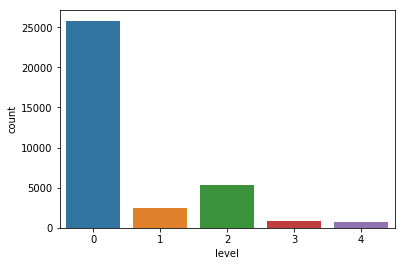

In [14]:
# Class distributions
import seaborn as sns
sns.countplot('level', data = train_labels)
# Highly imbalanced dataset LOL !

In [15]:
print("Counts of severity '0': {}".format(sum(train_labels.level==0)))
print("Counts of severity '1': {} ".format(sum(train_labels.level==1)))
print("Counts of severity '2': {}".format(sum(train_labels.level==2)))
print("Counts of severity '3': {} ".format(sum(train_labels.level==3)))
print("Counts of severity '4': {} ".format(sum(train_labels.level==4)))

Counts of severity '0': 25810
Counts of severity '1': 2443 
Counts of severity '2': 5292
Counts of severity '3': 873 
Counts of severity '4': 708 


In [21]:
print(train_labels.head(20))
print('.........')
print(train_labels.shape)

       image  level
0    10_left      0
1   10_right      0
2    13_left      0
3   13_right      0
4    15_left      1
5   15_right      2
6    16_left      4
7   16_right      4
8    17_left      0
9   17_right      1
10   19_left      0
11  19_right      0
12   20_left      0
13  20_right      0
14   21_left      0
15  21_right      0
16   22_left      0
17  22_right      0
18   23_left      0
19  23_right      0
.........
(35126, 2)


In [24]:
# Testing
print(train_labels.shape[0])
for i in range(0,5):
    print(train_labels['image'][i])


35126
10_left
10_right
13_left
13_right
15_left


In [30]:
# input image dimensions
img_rows, img_cols = 224, 224

In [46]:
# 8 gb RAM is too puny for this block to run...LOL !
'''from PIL import Image
from tqdm import tqdm
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img('D:/diabetic-retinopathy-detection/train.zip/train'+train_labels['image'][i]+'.jpeg',target_size=(img_rows,img_cols,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)'''

"from PIL import Image\nfrom tqdm import tqdm\ntrain_image = []\nfor i in tqdm(range(train_labels.shape[0])):\n    img = image.load_img('D:/diabetic-retinopathy-detection/train.zip/train'+train_labels['image'][i]+'.jpeg',target_size=(img_rows,img_cols,3))\n    img = image.img_to_array(img)\n    img = img/255\n    train_image.append(img)\nX = np.array(train_image)"

In [48]:
# Trying to load 1000 images 
# Its still loading !!!!!!
from PIL import Image
from tqdm import tqdm
train_image = []
for i in tqdm(range(1000)):
    img = image.load_img('D:/diabetic-retinopathy-detection/train.zip/train/'+train_labels['image'][i]+'.jpeg',target_size=(img_rows,img_cols,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


 10%|██████▏                                                         | 96/1000 [00:12<01:56,  7.77it/s]


 19%|████████████▏                                                  | 193/1000 [00:26<02:13,  6.04it/s]


 27%|█████████████████▏                                             | 272/1000 [00:44<02:14,  5.42it/s]


 36%|██████████████████████▍                                        | 356/1000 [01:00<02:02,  5.25it/s]


 44%|███████████████████████████▊                                   | 442/1000 [01:14<01:28,  6.30it/s]


 53%|█████████████████████████████████▎                             | 528/1000 [01:29<01:26,  5.45it/s]


 62%|███████████████████████████████████████                        | 621/1000 [01:45<00:40,  9.30it/s]


 71%|████████████████████████████████████████████▉                  | 713/1000 [01:59<00:58,  4.92it/s]


 80%|██████████████████████████████████████████████████▌            | 803/1000 [02:14<00:39,  5.04it/s]


 90%|████████████████████████████████████████████████████████▍      | 896/1000 [02:29<00:19,  5.45it/s]


 98%|██████████████████████████████████████████████████████████████ | 985/1000 [02:45<00:02,  5.95it/s]


100%|██████████████████████████████████████████████████████████████| 1000/1000 [02:47<00:00,  6.75it/s]

In [37]:
#######train_image = [0] #fuck

In [49]:
train_image[0:4]

[array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32), array([[[0., 0., 0.],
         [0., 0., 

In [50]:
train_image[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [51]:
# 1000 - No. of images 
# 224, 224 - Resized dims
# Channels
X.shape

(1000, 224, 224, 3)

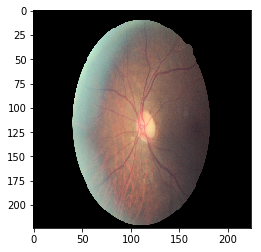

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X[0])

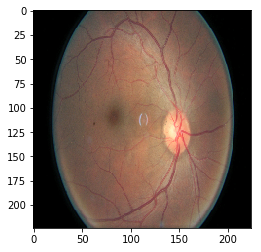

In [58]:
plt.imshow(X[200])

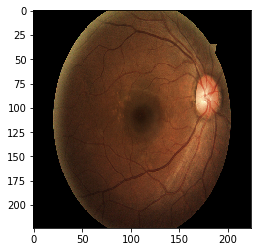

In [59]:
plt.imshow(X[765])

19_left
0


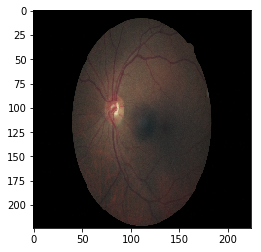

In [68]:
print(train_labels['image'][10])
plt.imshow(X[10])
print(train_labels['level'][10])
# 19_left is actually 0....so its working !

In [ ]:
(X, y) = (train_data[0],train_data[1])

In [75]:
data,Label = shuffle(X,train_labels['level'][0:1000], random_state=2)
train_data = [data,Label]

In [79]:
#train_data.shape
#train_data.type

In [81]:
#train_labels['level'][1:3]

In [102]:
train_data[0] # Images

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [103]:
train_data[1] # Labels

37     0
726    2
846    2
295    0
924    0
658    0
682    0
286    0
880    0
272    1
137    0
954    0
515    0
788    0
860    0
640    0
737    0
683    0
412    0
71     0
213    0
67     0
231    0
856    0
197    0
639    0
376    0
192    0
99     0
678    2
      ..
51     0
875    0
938    0
772    2
102    1
195    0
679    2
805    0
628    0
124    0
404    0
730    0
287    0
831    0
47     2
725    0
587    0
607    0
433    0
674    2
263    0
360    1
75     0
466    0
299    0
534    0
584    0
493    0
527    0
168    0
Name: level, Length: 1000, dtype: int64

In [105]:
(X, y) = (train_data[0],train_data[1]) # X = Images, y = Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
# 80 - 20 split

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print('..........')
print('80/20 Split')

(800, 224, 224, 3)
(800,)
(200, 224, 224, 3)
(200,)
..........
80/20 Split


0


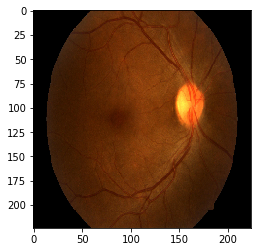

In [110]:
plt.imshow(X_train[0])
print(y_train[0])

In [112]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, CLASSES)
Y_test = np_utils.to_categorical(y_test, CLASSES)

In [113]:
# Augmentation
from keras.preprocessing.image import ImageDataGenerator

validationDataGenerator = ImageDataGenerator()
# Augmenting training images
trainDataGenerator = ImageDataGenerator(width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        rotation_range=15,
                                        zoom_range=0.1 )

batchsize=8

train_generator=trainDataGenerator.flow(X_train, 
                                        Y_train, 
                                        batch_size=batchsize) 

validation_generator=validationDataGenerator.flow(X_test, 
                                                  Y_test,
                                                  batch_size=batchsize)

In [114]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])

W0314 04:33:43.806486  6544 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [ ]:
# Training 

In [118]:
'''history = model.fit_generator(train_generator, 
                             steps_per_epoch = int(len(X_train)/batchsize)),
                             epochs = EPOCH,
                             validation_data = validation_generator,
                             validation_steps = int(len(X_test)/batchsize)'''


IndentationError: unexpected indent (<ipython-input-118-a2f40f59e47c>, line 3)

In [124]:
SPE = int(len(X_train)/batchsize) # Steps per epoch
VS = int(len(X_test)/batchsize) # Validation steps

In [126]:
history= model.fit_generator(train_generator, 
                             steps_per_epoch=SPE, 
                             epochs=10, 
                             validation_data=validation_generator, 
                             validation_steps=VS)

Epoch 1/10
100/100 [==============================] - ETA: 13:30 - loss: 1.5571 - acc: 0.62 - ETA: 12:54 - loss: 1.5537 - acc: 0.56 - ETA: 11:12 - loss: 1.5221 - acc: 0.62 - ETA: 10:16 - loss: 1.5077 - acc: 0.65 - ETA: 9:41 - loss: 1.4943 - acc: 0.6750 - ETA: 9:15 - loss: 1.4668 - acc: 0.729 - ETA: 9:00 - loss: 1.4661 - acc: 0.696 - ETA: 8:46 - loss: 1.4767 - acc: 0.640 - ETA: 8:37 - loss: 1.4772 - acc: 0.625 - ETA: 8:26 - loss: 1.4694 - acc: 0.625 - ETA: 8:20 - loss: 1.4458 - acc: 0.647 - ETA: 8:10 - loss: 1.4194 - acc: 0.677 - ETA: 7:58 - loss: 1.4053 - acc: 0.682 - ETA: 7:50 - loss: 1.3868 - acc: 0.696 - ETA: 7:41 - loss: 1.3752 - acc: 0.700 - ETA: 7:32 - loss: 1.3556 - acc: 0.710 - ETA: 7:23 - loss: 1.3441 - acc: 0.713 - ETA: 7:15 - loss: 1.3361 - acc: 0.708 - ETA: 7:08 - loss: 1.3189 - acc: 0.717 - ETA: 7:01 - loss: 1.2999 - acc: 0.725 - ETA: 6:54 - loss: 1.2886 - acc: 0.726 - ETA: 6:47 - loss: 1.2709 - acc: 0.733 - ETA: 6:40 - loss: 1.2481 - acc: 0.744 - ETA: 6:34 - loss: 1.2391 

100/100 [==============================] - ETA: 8:00 - loss: 1.0938 - acc: 0.500 - ETA: 7:54 - loss: 0.7894 - acc: 0.687 - ETA: 7:48 - loss: 0.8036 - acc: 0.708 - ETA: 7:42 - loss: 0.8037 - acc: 0.718 - ETA: 7:36 - loss: 0.7410 - acc: 0.750 - ETA: 7:33 - loss: 0.6982 - acc: 0.770 - ETA: 7:27 - loss: 0.7214 - acc: 0.767 - ETA: 7:21 - loss: 0.7438 - acc: 0.750 - ETA: 7:16 - loss: 0.7635 - acc: 0.750 - ETA: 7:12 - loss: 0.8482 - acc: 0.712 - ETA: 7:07 - loss: 0.8250 - acc: 0.727 - ETA: 7:02 - loss: 0.9467 - acc: 0.687 - ETA: 6:57 - loss: 0.9252 - acc: 0.701 - ETA: 6:52 - loss: 0.9248 - acc: 0.696 - ETA: 6:47 - loss: 0.9371 - acc: 0.691 - ETA: 6:41 - loss: 0.8980 - acc: 0.710 - ETA: 6:37 - loss: 0.9164 - acc: 0.705 - ETA: 6:32 - loss: 0.9118 - acc: 0.708 - ETA: 6:28 - loss: 0.9135 - acc: 0.710 - ETA: 6:23 - loss: 0.9263 - acc: 0.700 - ETA: 6:18 - loss: 0.9061 - acc: 0.708 - ETA: 6:14 - loss: 0.8797 - acc: 0.721 - ETA: 6:09 - loss: 0.8640 - acc: 0.728 - ETA: 6:04 - loss: 0.8417 - acc: 0.739

100/100 [==============================] - ETA: 6:44 - loss: 1.2856 - acc: 0.500 - ETA: 6:30 - loss: 0.9930 - acc: 0.625 - ETA: 6:24 - loss: 0.9520 - acc: 0.666 - ETA: 6:19 - loss: 0.9107 - acc: 0.687 - ETA: 6:15 - loss: 0.8470 - acc: 0.725 - ETA: 6:12 - loss: 0.9375 - acc: 0.687 - ETA: 6:11 - loss: 0.9547 - acc: 0.678 - ETA: 6:06 - loss: 0.9500 - acc: 0.671 - ETA: 6:02 - loss: 1.0521 - acc: 0.652 - ETA: 5:57 - loss: 1.0180 - acc: 0.675 - ETA: 5:53 - loss: 1.0510 - acc: 0.659 - ETA: 5:49 - loss: 1.0405 - acc: 0.666 - ETA: 5:45 - loss: 1.0129 - acc: 0.673 - ETA: 5:40 - loss: 0.9906 - acc: 0.687 - ETA: 5:36 - loss: 0.9595 - acc: 0.700 - ETA: 5:32 - loss: 0.9309 - acc: 0.710 - ETA: 5:27 - loss: 0.9139 - acc: 0.720 - ETA: 5:24 - loss: 0.8979 - acc: 0.729 - ETA: 5:20 - loss: 0.8655 - acc: 0.743 - ETA: 5:16 - loss: 0.8563 - acc: 0.743 - ETA: 5:13 - loss: 0.8630 - acc: 0.738 - ETA: 5:08 - loss: 0.8512 - acc: 0.744 - ETA: 5:04 - loss: 0.8513 - acc: 0.744 - ETA: 5:00 - loss: 0.8454 - acc: 0.744

100/100 [==============================] - ETA: 6:43 - loss: 1.4312 - acc: 0.625 - ETA: 6:35 - loss: 1.3467 - acc: 0.625 - ETA: 6:26 - loss: 1.2259 - acc: 0.625 - ETA: 6:22 - loss: 1.1014 - acc: 0.656 - ETA: 6:17 - loss: 0.9852 - acc: 0.700 - ETA: 6:12 - loss: 0.9554 - acc: 0.708 - ETA: 6:07 - loss: 0.9437 - acc: 0.696 - ETA: 6:03 - loss: 0.9207 - acc: 0.703 - ETA: 6:00 - loss: 0.9218 - acc: 0.694 - ETA: 5:56 - loss: 0.8625 - acc: 0.725 - ETA: 5:51 - loss: 0.8339 - acc: 0.738 - ETA: 5:47 - loss: 0.8496 - acc: 0.739 - ETA: 5:43 - loss: 0.8455 - acc: 0.740 - ETA: 5:39 - loss: 0.8717 - acc: 0.741 - ETA: 5:35 - loss: 0.8710 - acc: 0.733 - ETA: 5:31 - loss: 0.8492 - acc: 0.742 - ETA: 5:27 - loss: 0.8408 - acc: 0.742 - ETA: 5:23 - loss: 0.8551 - acc: 0.736 - ETA: 5:20 - loss: 0.8261 - acc: 0.750 - ETA: 5:16 - loss: 0.8583 - acc: 0.737 - ETA: 5:12 - loss: 0.8317 - acc: 0.750 - ETA: 5:08 - loss: 0.8371 - acc: 0.750 - ETA: 5:04 - loss: 0.8148 - acc: 0.760 - ETA: 5:00 - loss: 0.8556 - acc: 0.739

100/100 [==============================] - ETA: 6:43 - loss: 0.2641 - acc: 1.000 - ETA: 6:39 - loss: 0.8744 - acc: 0.750 - ETA: 6:35 - loss: 0.7526 - acc: 0.791 - ETA: 6:31 - loss: 0.6269 - acc: 0.843 - ETA: 6:26 - loss: 0.6459 - acc: 0.850 - ETA: 6:22 - loss: 0.6664 - acc: 0.854 - ETA: 6:17 - loss: 0.6374 - acc: 0.857 - ETA: 6:12 - loss: 0.7068 - acc: 0.812 - ETA: 6:08 - loss: 0.7679 - acc: 0.791 - ETA: 6:04 - loss: 0.7145 - acc: 0.812 - ETA: 5:59 - loss: 0.7867 - acc: 0.784 - ETA: 5:54 - loss: 0.7817 - acc: 0.781 - ETA: 5:49 - loss: 0.8076 - acc: 0.769 - ETA: 5:45 - loss: 0.8055 - acc: 0.767 - ETA: 5:41 - loss: 0.7983 - acc: 0.775 - ETA: 5:36 - loss: 0.7636 - acc: 0.789 - ETA: 5:32 - loss: 0.8192 - acc: 0.772 - ETA: 5:27 - loss: 0.8306 - acc: 0.763 - ETA: 5:23 - loss: 0.8223 - acc: 0.763 - ETA: 5:19 - loss: 0.8508 - acc: 0.756 - ETA: 5:14 - loss: 0.8233 - acc: 0.767 - ETA: 5:10 - loss: 0.8476 - acc: 0.761 - ETA: 5:06 - loss: 0.8534 - acc: 0.760 - ETA: 5:02 - loss: 0.8731 - acc: 0.755

In [ ]:
# Start - 4:43 AM
# End - 5:00 AM
# 2 epochs ... val acc: 71 %
# Runtime: Estimated 1hr for 1000 images out of 36000

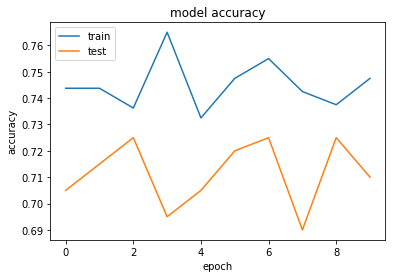

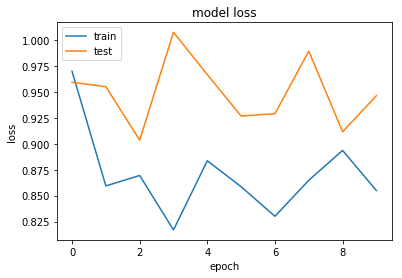

In [127]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#plt.savefig('model_loss.png')

In [128]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.9466539764404297, 0.71]


In [129]:
from keras.models import load_model
model.save('retinopathy_predict.h5')